# Modelo de Otimização de Nível de Estoque

#### # Importando módulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth
import seaborn as sns

## Parte I: Definindo variáveis e fórmulas

### Variáveis:

#### Da = Demanda anual (unidades)
#### Qmin = Estoque mínimo de segurança (unidades)
#### T = Intervalo/tempo de ressuprimento (dias)
#### LT = Tempo de ressuprimento (dias)

### ---

#### C = custo unitário do item (rs)
#### S = custo de processamento de pedido (rs)
#### i = custo de manutenção de estoque (%)
#### N = número de reposições por ano 

### ---

#### Tx = Taxas de juros nominal anual da economia (%)

### Fórmulas:

####  # Cálculo de quantidade de itens indicada no ponto de pedido:

##### ROP = quantidade no ponto de pedido

##### ROP = ((Da/12) * LT)/ 30 + Qmin

#### # Cálculo de estoque médio anual:

##### Qmed = etoque médio

##### Qmed = (Qmax + Qmin)/ 2

#### # Cálculo de lote econômico de compra:

##### Qe = quantidade do lote econômico de compra

##### Qe = ((2 * Da * S) / (i * C)) ** 0.5

#### # Cálculo do número de reposições por ano

##### N = número de reposições

##### N = Da / Qe

#### # Cálculo do intervalo de ressuprimento anual 

##### T = Intervalo/tempo de ressuprimento

##### T = (Qe / Da) * 365

#### # Cáculo de Estoque Máximo:

##### Qmax = estoque máximo

##### Qmax = QR (Ou Qe) + Qmin

#### # Cálculo do Custo Unitário Total:

##### Ct = custo total

##### Ct = (S/Qe) + (C * i) + C

#### # Cálculo de Lucro

##### L = V - Ct

#### # Função para verificar se o o nível de estoque está otimizado:

In [2]:
def estoque_otimizado(Taxa_de_Juros, Custo_Unitario_Total, Valor_Unitario_Venda, Ciclos_Reposicao):
    Juros_Parcial = Taxa_de_Juros / Ciclos_Reposicao
    Lucro = Valor_Unitario_Venda - Custo_Unitario_Total
    Ganho_Juros = Custo_Unitario_Total * Juros_Parcial  
    if Lucro > Ganho_Juros:
        print("O estoque está otimizado.")
    else:
        print("O estoque não está otimizado.")

## Parte II - Importando dados e definindo valores

In [3]:
# Demanda anual da mercadoria X:

Da = 8000
    
# Estoque mínimo de segurança definido:

Qmin = 150

# Tempo (dias) que leva para o ressuprimento em média:

LT = 14

# Custo unitário (R$) da mercadoria X:

C = 32

# Custo (R$) de processamento de pedido:

S = 47

# Custo (%) de manutenção de estoque:

i = 0.15

# Taxa de juros (%) anual:

Tj = 0.13

# Valor de venda unitário (R$) da mercadoria X:

V = 45

In [4]:
custos_estoque = pd.read_csv('dados/Custos_Estoque.csv')
custos_estoque.head()

,Reposições,Tamanho do lote,Custo dos pedidos,Custo de manutenção,Custo total
0,1,8000,47,19200,19247
1,2,4000,94,9600,9694
2,3,2667,141,6401,6542
3,4,2000,188,4800,4988
4,5,1600,235,3840,4075


## Parte III - Analisando dados e otimizando estoque

In [5]:
Qe = ((2 * Da * S) / (i * C)) ** 0.5

print("O lote econômico de compra é de {} unidades.".format(round(Qe)))

O lote econômico de compra é de 396 unidades.


In [6]:
T = (Qe / Da) * 365

print("O intervalo de ressuprimento deve ser de {0} em {1} dias.".format(round(T), round(T)))

O intervalo de ressuprimento deve ser de 18 em 18 dias.


In [7]:
N = Da / Qe

print("O número de reposições por ano deve ser de {} vezes.".format(round(N)))

O número de reposições por ano deve ser de 20 vezes.


#### # Tabela de dados feita no Excel com outro método para confirmar o lote econômico de compra e número de reposições

In [8]:
custos_estoque

,Reposições,Tamanho do lote,Custo dos pedidos,Custo de manutenção,Custo total
0,1,8000,47,19200,19247
1,2,4000,94,9600,9694
2,3,2667,141,6401,6542
3,4,2000,188,4800,4988
4,5,1600,235,3840,4075
5,6,1333,282,3199,3481
6,7,1143,329,2743,3072
7,8,1000,376,2400,2776
8,9,889,423,2134,2557
9,10,800,470,1920,2390


In [9]:
valor_minimo = custos_estoque['Custo total'].min()
selecao = custos_estoque['Custo total'] == valor_minimo
valor_minimo = custos_estoque[selecao]
lote = valor_minimo['Tamanho do lote'].values[0]
custo = valor_minimo['Custo total'].values[0]
valor_minimo

,Reposições,Tamanho do lote,Custo dos pedidos,Custo de manutenção,Custo total
19,20,400,940,960,1900


In [10]:
print("Como pode ser observado na tabela, o lote econômico de compra com o menor valor por lote de R$ {:.2f} é de {} unidades, sendo o valor mais próximo das {} unidades informadas pelo método anterior e com {} reposições.".format(custo, lote, round(Qe), round(N)))

Como pode ser observado na tabela, o lote econômico de compra com o menor valor por lote de R$ 1900.00 é de 400 unidades, sendo o valor mais próximo das 396 unidades informadas pelo método anterior e com 20 reposições.


#### # Plotando gráfico com o ponto ótimo de reposições do lote econômico

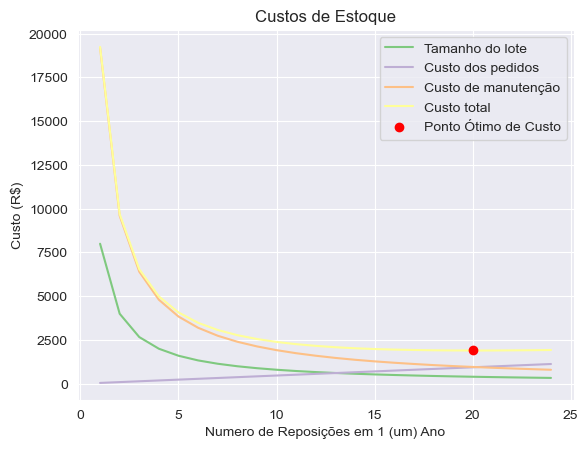

In [18]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

x_values = list(range(1, 25))

difference = np.abs(custos_estoque['Custo dos pedidos'] - custos_estoque['Custo de manutenção'])

min_index = np.argmin(difference)

plt.plot(x_values, custos_estoque['Tamanho do lote'], label='Tamanho do lote')
plt.plot(x_values, custos_estoque['Custo dos pedidos'], label='Custo dos pedidos')
plt.plot(x_values, custos_estoque['Custo de manutenção'], label='Custo de manutenção')
plt.plot(x_values, custos_estoque['Custo total'], label='Custo total')

plt.scatter(x_values[min_index], custos_estoque['Custo total'][min_index], color='red', zorder=5, label='Ponto Ótimo de Custo')

plt.xlabel('Numero de Reposições em 1 (um) Ano')
plt.ylabel('Custo (R$)')
plt.title('Custos de Estoque')

plt.legend()

plt.show()

In [12]:
ROP = (((Da/12) * LT)/ 30) + Qmin

print("O ponto de pedido é quando o estoque estiver em  {} unidades.".format(round(ROP)))

O ponto de pedido é quando o estoque estiver em  461 unidades.


In [13]:
Qmax = Qe + Qmin

print("O estoque mínimo é de {} unidades e o estoque máximo é de {} unidades.".format(round(Qmin), round(Qmax)))

O estoque mínimo é de 150 unidades e o estoque máximo é de 546 unidades.


In [14]:
Ct = (S/Qe) + (C * i) + C

print("O custo total por mercadoria é de {} R$.".format(round(Ct, 2)))

O custo total por mercadoria é de 36.92 R$.


In [15]:
L = V - Ct

print("O lucro por unidade é de {} R$.".format(round(L, 2)))

O lucro por unidade é de 8.08 R$.


In [16]:
estoque_otimizado(Tj, Ct, V, N)

O estoque está otimizado.


#### # Plotando Gráfico de Serra do Nível de Estoque Anual

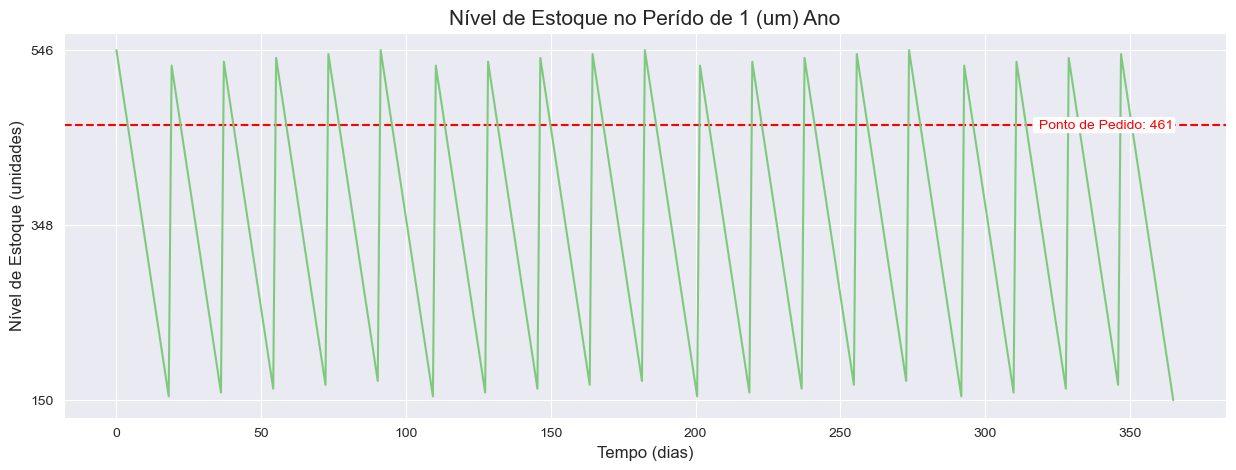

In [17]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))

t = np.linspace(0, 365, 365)

Qmed = (Qmax + Qmin)/ 2

sawtooth_waveform = sawtooth(2 * np.pi * 20 * t[::-1])

ponto_pedido = np.interp(ROP, [Qmin, Qmed, Qmax], [-1, 0, 1])

plt.axhline(y=ponto_pedido, color='r', linestyle='--', label='Ponto de Pedido')
plt.text(t[-1], ponto_pedido, f' Ponto de Pedido: {round(ROP)}', color='r', verticalalignment='center', horizontalalignment='right', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.1', ))

plt.plot(t, sawtooth_waveform)

plt.yticks([-1, 0, 1], [Qmin, int(round(Qmed)), round(Qmax)])  # Map -1 to 150, 0 to 325, 1 to 500

plt.xlabel('Tempo (dias)', fontsize = 12)
plt.ylabel('Nível de Estoque (unidades)', fontsize = 12)
plt.title('Nível de Estoque no Perído de 1 (um) Ano', fontsize = 15)

plt.grid(True)
plt.show()

## Parte IV: Conclusão  

### Com base nos dados, o lote econômico de compra deve ser de 396 unidades solicitadas a cada 18 dias (ou seja, 20 reposições ao ano), quando o nível de estoque estará em 461 unidades. Dessa forma, o uso de estoque estará otimizado em seu ponto ótimo. 